
Лабораторна робота 3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією"
-

**Мета**: закріпити на практиці використання алгоритмів регуляризації в задачах оптимізації функціонала якості засобами мови Python

::: callout-note
## Примітка
Попередньо опрацювати матеріали **Лекції 5**.
:::

## Що ви будете вміти?
* Використовувати L2- та L1-регуляризатори в задачах регресії та класифікації
* Реалізувати простий лінійний бінарний класифікатор на основі оптимізації функціонала якості стохастичним градієнтним спуском з регуляризаторами засобами мови Python

## Короткі теоретичні відомості

### Проблема перенавчання. Регуляризація

Явище *перенавчання моделі*, це коли похибка прогнозу суттєво перевищує похибку навчання (рис. 5.4).Оцінити цей ефект можна, наприклад, за допомогою процедури [*кросвалідації*](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

![*Рис. 5.4*](image 5/ris15.png)

Якщо виявлено ефект перенавчання, що робити у цьому випадку для його зменшення?

першим очевидним виходом з ситуації є відкидання частини ознак і зменшення розмірності моделі, але це не завжди можливо. Наприклад, при навчанні нейронних мереж такий підхід не підходить. Як розв'язати цю проблему у тих випадках, коли зниження розмірності ознакового простору не можливе?

Покажемо, як це робиться в задачах машинного навчання.

### L2-регуляризатор

Розглянемо простий приклад.

Розглянемо функцію $y(x) = \frac{1}{1 + 10 x^2}, x \in [0; 10]$ 

і спробуємо апроксимуємо послідовність даних поліномом, збільшуючи степінь полінома.

Степінь полінома 3:  
[-0.00406535  0.0726068  -0.38709501  0.58524801] 

Степінь полінома 5:  
 [-3.80637846e-04  1.08126765e-02 -1.14188591e-01  5.49489716e-01
 -1.17447670e+00  8.71963966e-01]
Степінь полінома 10:  
[-1.26252985e-07  5.76781414e-06 -1.05030157e-04  9.09286288e-04
 -2.58708457e-03 -1.92393634e-02  2.13797583e-01 -8.96937855e-01
  1.95728683e+00 -2.19007649e+00  1.02203201e+00
Степінь полінома 10:  
[-1.26252985e-07  5.76781414e-06 -1.05030157e-04  9.09286288e-04
 -2.58708457e-03 -1.92393634e-02  2.13797583e-01 -8.96937855e-01
  1.95728683e+00 -2.19007649e+00  1.02203201e+00]]
0]

Ми бачимо, що значення коефіцієнтів зі збільшенням степіня поліному зростають. А значить, і їх вплив також, що по суті і пояснює ефект перенавчання (перепідгонки моделі).

Для розв'язання цієї проблеми запропоновано таку еврістику: 

$\widetilde L(\omega) = L_i(\omega) + \frac{\lambda}{2} \left\| \omega \right\|^2  =  L_i(\omega) + \frac{\lambda}{2} \sum_{j=1}^n \omega_j^2 \rightarrow \min \limits_{\substack{\omega}}.$

Тут у нашу функцію введено додаткову складову, мета якої нормувати величини коефіцієнтів $\omega$. А параметр $\lambda$ задає ступінь впливу цієї компоненти, тобто "наскільки сильно ми хочемь звертати увагу на великі значення коефіцієнтів.

::: callout-important
## Важливо!
При цьому оцінку $\omega_0$, яка відповідає за зсув гіперплощини, у праву частину рівння ми не включаємо.
:::

Пояснимо, як це працює. Визначимо градієнт функції втрат:

$\nabla \widetilde L_i(\omega) = \nabla L_i (\omega) + \lambda \omega$

Тоді:

$\omega^{t+1} = \omega^{(t)} - \eta \nabla \widetilde L_i(\omega^{(t)})$

$\omega^{t+1} = \omega^{(t)} - \eta \Big[ L_i (\omega^{(t)}) + \lambda \omega^{(t)}  \Big]$

$\omega^{t+1} = (1- \eta \lambda) \omega^{(t)} - \eta  L_i (\omega^{(t)})$

Значенням коефіцієнта $\lambda$ ми можемо регулювати ступенем затухання коефіцієнтів.

Такий підхід в машинному навчанні називається *L2-регуляризацією*, хоча в аналізі даних частіше зустрічається під назвою *гребенева регресія*.

Нижче наведений код поліноміальної апроксимації нашої функції без регуляризатора, який довзовляє змоделювати ситуацію і відслідкувати зростання коефіцієнтів апроусимуючого полінома, що відповідають членам з більшими степенями.

### Приклад поліноміальної регресії без регуляризації

In [24]:
import numpy as np

# Функція для передбачення значень поліноміальної моделі
def predict_poly(x, koeff):
    res = 0
    # Обчислення значень для кожного степеня x та відповідного коефіцієнта
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    # Обчислення значення полінома за формулою
    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

# Створення даних для x та y
x = np.arange(0, 10.1, 0.1)
y = 1 / (1 + 10 * np.square(x)) # обчислення значення функції

# Обрання кожної другої точки для тренувальних даних
x_train, y_train = x[::2], y[::2]

N = len(x)

# Підгонка полінома 10-го степеня до тренувальних даних
z_train = np.polyfit(x_train, y_train, 15)
print(z_train)

[ 2.96493630e-09 -2.31259103e-07  8.15825261e-06 -1.72103400e-04
  2.41852058e-03 -2.38692506e-02  1.69935659e-01 -8.82321531e-01
  3.33705073e+00 -9.07690986e+00  1.72804336e+01 -2.18948897e+01
  1.66670858e+01 -5.60555620e+00 -8.87251207e-01  1.00208491e+00]


### Приклад поліноміальної регресії з L2-регуляризатором 

Розгялнемо апроксимацію поліномом для функції

$y(x) = x^3 - 10 x^2 + 3x + 500$

[ 4.97803514e+02 -5.96264433e-01 -1.00339740e+00 -1.27489953e+00
 -1.09049056e+00 -1.84981692e-01  6.58688889e-01 -3.03713412e-01
  6.88149673e-02 -8.98809344e-03  6.90378060e-04 -2.90719210e-05
  5.19236144e-07]


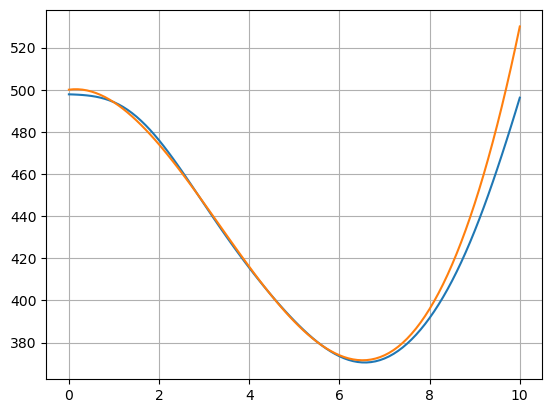

In [26]:
# Приклад роботи регуляризатора L2

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функція у вигляді полінома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # розмір простору ознак (степінь полінома N-1)
L = 20  # при збільшенні N збільшується L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матриця вхідних векторів
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матриця lambda*I
IL[0][0] = 0  # перший коефіцієнт не регуляризується
X_train = X[::2]  # навчальна вибірка
Y = y_train  # навчальна вибірка

# обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL) # Тут і нижче @ - оператор точного матричного множення
w = Y @ X_train @ A
print(w)

# відображення початкового графіка та прогнозу
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy) # прогноз моделі
plt.plot(x, y) # справжня поведідка функції
plt.grid(True)
plt.show()


### L1-регуляризатор 

Ідея цієї евристики полягає в тому,що ми замість квадратичної норми вектора $\omega$

$\widetilde L(\omega) = L_i(\omega) + \frac{\lambda}{2} \left\| \omega \right\|^2  =  L_i(\omega) + \frac{\lambda}{2} \sum_{j=1}^n \omega_j^2 \rightarrow \min \limits_{\substack{\omega}}.$

в регулязизаторі використовуємо його модуль:

$\widetilde L(\omega) = L_i(\omega) + \frac{\lambda}{2} \left\| \omega \right\|^2  =  L_i(\omega) + \frac{\lambda}{2} \sum_{j=1}^n |\omega_j| \rightarrow \min \limits_{\substack{\omega}}.$

Можна показати, що такий підхід має певні переваги, однак точний аналітичний розв'язок не може бути знайдений, так як функція $|\omega|$ має розрив у точці 0. Однак, після виконання певної модифікації функціонала, для розв'язку задачі оптимізації можна застосувати градієнтний спуск:

$\nabla \widetilde L_i (\omega) = \nabla L_i (\omega) + \lambda sign(\omega),$

$sign(x)=
\begin{cases}
+1, & \text{якщо $x>0$,} \\
0, & \text{якщо $x=0$,} \\
-1, & \text{якщо $x<0$.}
\end{cases}$

![*Рис. 5.5*](image 5/ris16.png)

Далі, якщо застосувати градієнтний спуск, матимемо:

$\omega^{t+1} = \omega^{(t)} - \eta \nabla \widetilde L_i(\omega^{(t)}) - \lambda sign(\omega),$

$\lambda = \eta \lambda.$

Тепер покажемо, як це буде працювати в нашій задачі.

### Бінарний лінійни класифікатор з регуляризаторами 

**Таблиця 5.1:** *Дані про жуків*

| № | Ширина | Довжина | Жук |
|------|------|------|------|
| 1    | 10    | 50    |гусениця |
| 2    | 20    | 30   | божа корівка|
| 3    | 25   | 30  | божа корівка|
| 4    | 20   | 60   | гусениця|
| 5    | 15   | 70    | гусениця|
| 6    | 40   | 40   | божа корівка|
| 7    | 30   | 45   | божа корівка|
| 8    | 20   | 45   | гусениця|
| 9    | 40   | 30   | божа корівка|
| 10    | 7    | 35    | гусениця|

На вході маємо навчальну вибірку $x_i = [w_i, h_i]^T$, $y_i \in {-1; +1}, i=1, 2, ..., 10$

Ми розширемо простір ознак наступним чином:

$x_i = [w_i, h_i, 10w_i, 10h_i, 5(w_i + h_i)]^T$

Таким чином ми спеціально моделюємо лінійну залежність між ознаками. А з застосуванням методів регуляризації, покажемо, як це працює.

Далі, як і раніше, модель маэ вигляд

$a(x) = sign(\langle \omega, x \rangle),$

а функціонал якості:

$Q(a, X^l) = \sum_{l=1}^l \Big[a(x_i \ne y_i)\Big] \le \sum_{i=1}^l L_i (\omega, x_i).$

А в якості функції втрат візьмемо сігмоїдальну функцію

$L(\omega, x_i, y_i) = \frac{2}{(1 + e^M)} = \frac{2}{1+ e^{\omega^T x_i y_i}}.$

Візьмемо похідну:

$\frac{dL(\omega, x_i, y_i)}{d \omega} = - \frac{2}{(1 + e^{\omega^T x_i y_i})^2} e^{\omega^T x_i y_i} x_i^T y_i.$

Отже, для алгоритму стохастичного спуску запишемо

$\omega^{t+1} = \omega^{(t)} - \eta \frac{dL(\omega, x_i, y_i)}{d \omega} - \lambda sign(\omega).$

Розглянемо на прикладі роботу регуляризаторів на прикладі задачі бінарної класифікації і покажемо, у чому перевага L1-регуляризатора над L2 регуляризатором.

[ 6.73347726e-06 -1.03461200e-05  6.45773348e-02 -3.41934612e-02
 -2.80632135e-05]
0.03309868677348152


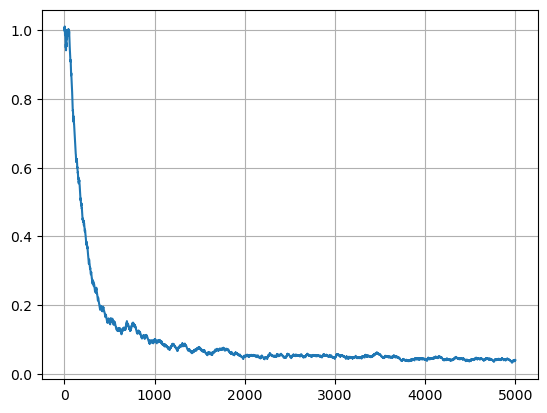

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0 # Коефіцієнт L1-регуляризатора 
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Навчальна вибірка з трьома ознаками (третій - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001             # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                 # Кількість ітерацій SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()


## Завдання для самостійної роботи 

1. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 1. Проаналізувати результати.
1. Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 2. Проаналізувати результати.  
1. Побудувати бінарний лінійний-класифікатор з L1-регуляризатором згідно з розглянутим прикладом 3 *для даних свого варіанту*, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
1. Модифікувати код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. Проаналізувати отримані результати і порівняти їх з попередніми результатами.
1. Дати відповіді на контрольні запитання.
1. Відправити результати роботи у файлі lab_3_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Відповіді на контрольні питання


1. Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації
    - L2-регуляризатор - це техніка в машинному навчанні, яка використовується для управління складністю моделі та запобігання перенавчанню
    - Він використовується в задачах регресії та класифікації для запобігання перенавчанню моделей шляхом додавання квадратичного штрафу за великі ваги до функції втрат
2
2. Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчанн
   - L1-регуляризація має тенденцію зводити деякі ваги до нуля, що сприяє створенню розріджених моделей. Це корисно для відбору ознак, оскільки модель автоматично відкидає менш значущі ознаки в той час як L2-регуляризація зменшує ваги більш рівномірно і зазвичай не зводить їх до нуля, але робить ваги дуже маленькими. Це допомагає контролювати складність моделі, знижуючи її варіативність без значного впливу на кількість ознак.я4
3. Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Pyth
   - див. приклад 1o6?
4. Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала яко
   - це метод оптимізації, який використовується для мінімізації функції втрат у машинному навчанні та статистичній оптимізації. Основна ідея методу полягає у виконанні ітеративного процесу оновлення параметрів моделі, використовуючи лише один або декілька випадково обраних прикладів даних на кожному кроці, а не весь набір данихс8і?
5. Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регр
   - Використання L1-регуляризатора сприяє створенню розріджених моделей, що важливо для відбору ознак. L2-регуляризатор стабілізує ваги, запобігаючи їхньому надмірному зростанню, що зменшує ризик перенавчання. Обидва регуляризатори покращують загальну ефективність моделейесії?

##### Приклад 1 (реалізація простого лінійного бінарного класифікатору за допомогую стохастичного градієнтного спуску)

In [23]:
import numpy as np

# Сигмоїдна функція
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Оновлення ваг
def update_weights(x, y, w, b, learning_rate):
    y_pred = sigmoid(np.dot(w, x) + b)
    error = y - y_pred
    w_grad = -error * x
    b_grad = -error
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    return w, b

# Тренування моделі
def train_sgd(X, Y, epochs, learning_rate):
    w = np.zeros(X.shape[1])
    b = 0
    for epoch in range(epochs):
        for x, y in zip(X, Y):
            w, b = update_weights(x, y, w, b, learning_rate)
    return w, b
    
# Приклад виклику
# w, b = train_sgd(X_train, y_train, epochs=100, learning_rate=0.01)
# w - ваги
# b - зміщення

### Варіант індивідульного завдання №7
#### Відтворення прикладу апроксимації поліномом без регулязації

[-5.34146234e+03 -4.47169108e+02 -2.12070817e+02 -7.75953059e+01
  5.34741276e+02  2.33003130e+02  1.42377461e+02 -2.88152392e+01
 -1.69904086e+02 -3.21340019e+01  7.75146781e+01  1.61134551e+02
  1.30121925e+02  5.45814575e+03  2.89836217e+02  2.09473403e+02
  1.41602433e+02  8.99319351e+00 -2.46805828e+02 -8.08063572e+01
 -1.11923830e+02  3.00680110e+00 -2.15007424e+01 -1.31426038e+02
  7.21633759e+01 -9.66746316e+01]


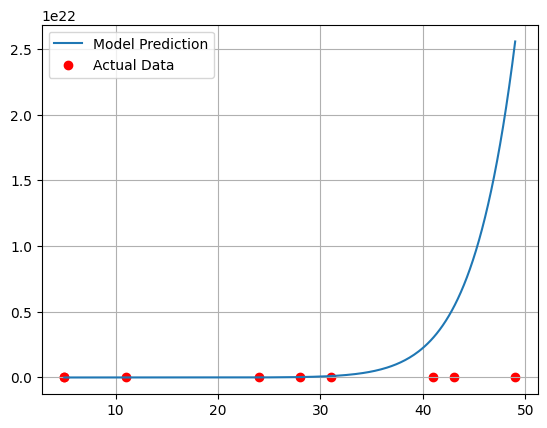

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../data.csv')
x_train = data[['Size', 'Shape']].values  # Два розміри ознаки
y_train = data['Category'].values

N = 13
L = 20

# Розрахунок поліноміальних ознак для кожної вимірності
X = np.hstack([np.array([[x**n for n in range(N)] for x in x_train[:, i]]) for i in range(x_train.shape[1])])
IL = np.diag([L] * (N * x_train.shape[1]))
IL[0][0] = 0  # Перший коефіцієнт не регуляризується

# Використання всіх доступних даних для навчання
X_train = X
Y = y_train

# Розрахунок коефіцієнтів
A = np.linalg.inv(X_train.T @ X_train + IL)
w = A @ X_train.T @ Y

print(w)

# Відображення початкового графіка та прогнозу
# Припустимо, що ми прогнозуємо лише по першій ознаці (Size)
x = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 300)
X_plot = np.array([[xi**n for n in range(N)] for xi in x])
yy = X_plot @ w[:N]  # використовуємо лише перші N коефіцієнтів для першої ознаки

plt.plot(x, yy, label='Model Prediction')
plt.scatter(x_train[:, 0], y_train, color='red', label='Actual Data')
plt.legend()
plt.grid(True)
plt.show()


#### Відтворення бінарного лінійного-класифікатору з L1-регуляризатором згідно з розглянутим прикладом з данними варіанту №7, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).

[2.19104717e-06 2.46051476e-06 3.51910472e-04 1.73746051e-02
 5.43325781e-03]
1.1158954359883155


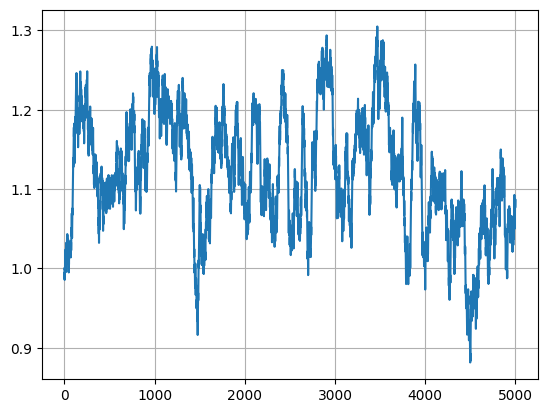

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../data.csv')

# Навчальна вибірка з трьома ознаками (третій - константа +1)
x_train = data[['Size', 'Shape']].values  # Два розміри ознаки
x_train = np.array([x.tolist() + [10 * x[0], 10 * x[1], 5 * (x[0] + x[1])] for x in x_train])
y_train = data['Category'].values

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0  # Коефіцієнт L1-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)
    
fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001            # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train)  # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])  # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # Справжнє значення емпіричного ризику після навчання
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()


#### Варінат коду код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. 

[ 1.90275617e+06 -7.75871867e+05  1.06616674e+05 -6.13826901e+03
  1.16608802e+02  2.31826779e+00 -1.09951841e-01  8.33589011e-04
 -8.91629781e-06  3.51910449e-07  1.55427191e-08 -6.00012138e-10
  5.01476931e-12 -7.68422366e-03  1.69706805e-02  6.95942827e-04
 -5.28958500e-05  2.78640428e-07 -5.35031668e-08  4.26326677e-09
 -3.27042000e-11 -2.33348245e-12  1.19295874e-14  1.32656107e-15
 -1.96236901e-17  4.91352780e-20 -2.04459969e-12 -2.04459861e-12
 -2.04459753e-12 -2.04459645e-12 -2.04459537e-12 -2.04459429e-12
 -2.06633970e-12 -2.06633862e-12 -2.06633754e-12 -2.06633646e-12
 -2.07277467e-12 -2.07277359e-12 -2.07277251e-12]


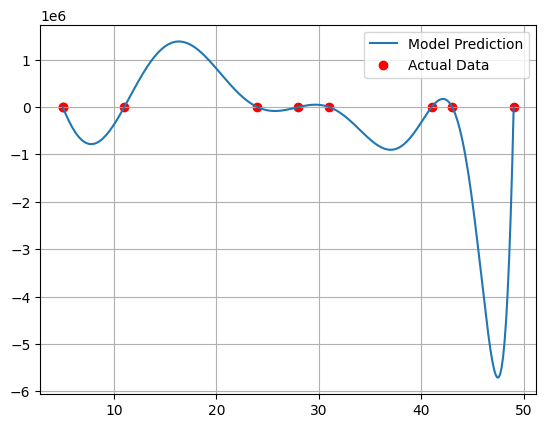

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../data.csv')

# Зчитування ознак з файлу. Додаємо третю ознаку як константу +1 для кожного прикладу
x_train = np.hstack((data[['Size', 'Shape']].values, np.ones((data.shape[0], 1))))
y_train = data['Category'].values

N = 13  # степінь полінома N-1 для кожної ознаки
L = 20  # значення лямбда для регуляризації

# Створення поліноміальної матриці ознак для трьох ознак
X = np.hstack([x_train[:, i:i+1]**n for i in range(x_train.shape[1]) for n in range(1, N+1)])

# Матриця регуляризації
IL = np.diag([L] * X.shape[1])
IL[0][0] = 0  # Перший коефіцієнт не регуляризується, якщо він присутній

# Обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X.T @ X + IL)
w = A @ X.T @ y_train
print(w)

# Відображення графіка для першої ознаки (Size) та відповідного прогнозу
x_plot = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 300)
X_plot = np.hstack([x_plot.reshape(-1, 1)**n for n in range(1, N+1)])
y_plot = X_plot @ w[:N]  # використовуємо лише ваги для першої ознаки

plt.plot(x_plot, y_plot, label='Model Prediction')
plt.scatter(x_train[:, 0], y_train, color='red', label='Actual Data')
plt.legend()
plt.grid(True)
plt.show()


## References

1. [Машинное обучение. Вводная лекция. К.В. Воронцов, Школа анализа данных, Яндекс.](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=2)
1. [#12. L1-регуляризатор. Отличия между L1- и L2-регуляризаторами | Машинное обучение](https://www.youtube.com/watch?v=v6PDZ9zE4As&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=13)
1. [NumPy](https://numpy.org)
1. [NumPy](https://wesmckinney.com/book/preliminaries)